# Potrzebne pakiety: (pip install)

pandas, numpy, matplotlib, warnings, sklearn

# Źródła kodu:

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://archive.ics.uci.edu/ml/machine-learning-databases/

https://scikit-learn.org/stable/modules/neighbors.html

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [0]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', sep='\s+', names=names)
print(df.shape)
df.head(10)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [0]:
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
x = df.loc[:, features].values
y = df.loc[:,['CHAS']].values
x = StandardScaler().fit_transform(x)
standarized_df = pd.DataFrame(x)

Po standaryzacji:

In [0]:
standarized_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
5,-0.417044,-0.487722,-1.306878,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322,0.671222
6,-0.410243,0.048772,-0.476654,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268,0.039964
7,-0.403696,0.048772,-0.476654,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700,0.497082
8,-0.395935,0.048772,-0.476654,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774,-0.656595
9,-0.400729,0.048772,-0.476654,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344,-0.395385


In [0]:
def kpcaxD(dims, k=True):
    if k:
        kpca = KernelPCA(kernel="rbf", n_components=None)
        principalComponents = kpca.fit_transform(x)
    else:
        pca = PCA(n_components=None)
        principalComponents = pca.fit_transform(x)
    if dims == 2:
        principalDf = pd.DataFrame(data = principalComponents
                     , columns = ['principal component 1', 'principal component 2'])
        finalDf = pd.concat([principalDf, df[['CHAS']]], axis = 1)
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        if k:
            ax.set_title('2 component kPCA', fontsize = 20)
        else:
            ax.set_title('2 component PCA', fontsize = 20)
        CHAS = [0,1]
        colors = ['r', 'g']
        for ch, color in zip(CHAS,colors):
            indicesToKeep = finalDf['CHAS'] == ch
            ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                       , finalDf.loc[indicesToKeep, 'principal component 2']
                       , c = color
                       , s = 50)
        ax.legend(CHAS)
        ax.grid()
    elif dims == 3:
        principalDf = pd.DataFrame(data = principalComponents
                     , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
        finalDf = pd.concat([principalDf, df[['CHAS']]], axis = 1)
        fig = plt.figure(figsize = (8,8))
        ax = plt.axes(projection='3d')
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_zlabel('Principal Component 3', fontsize = 15)
        if k:
            ax.set_title('3 component kPCA', fontsize = 20)
        else:
            ax.set_title('3 component PCA', fontsize = 20)
        CHAS = [0,1]
        colors = ['r', 'g']
        for ch, color in zip(CHAS,colors):
            indicesToKeep = finalDf['CHAS'] == ch
            ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                       , finalDf.loc[indicesToKeep, 'principal component 2']
                       , c = color
                       , s = 50)
        ax.legend(CHAS)
        ax.grid()
    if k:
        return kpca
    else:
        return pca

<IPython.core.display.Javascript object>


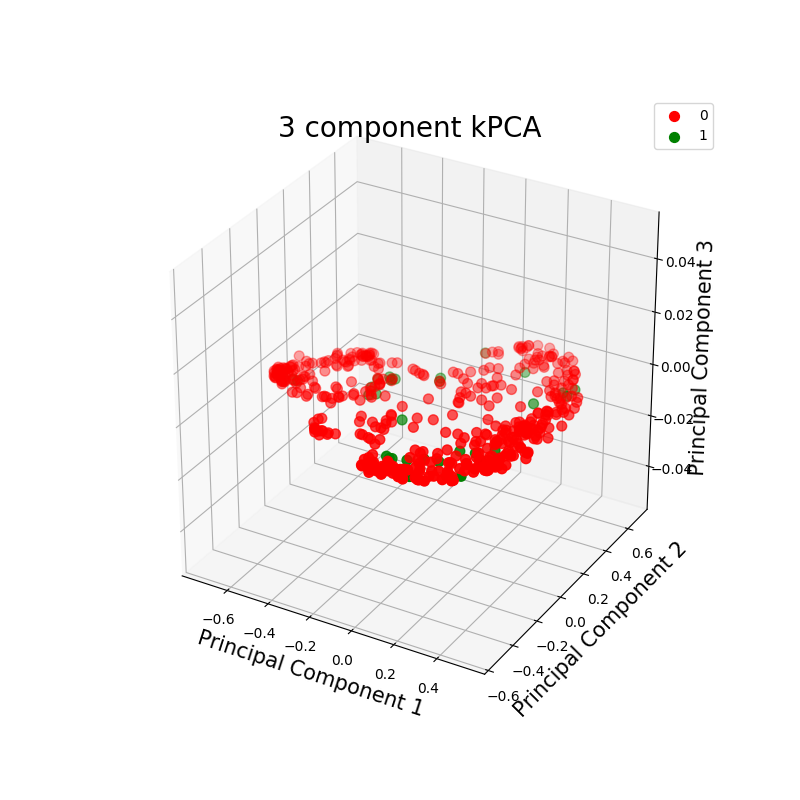

<IPython.core.display.Javascript object>


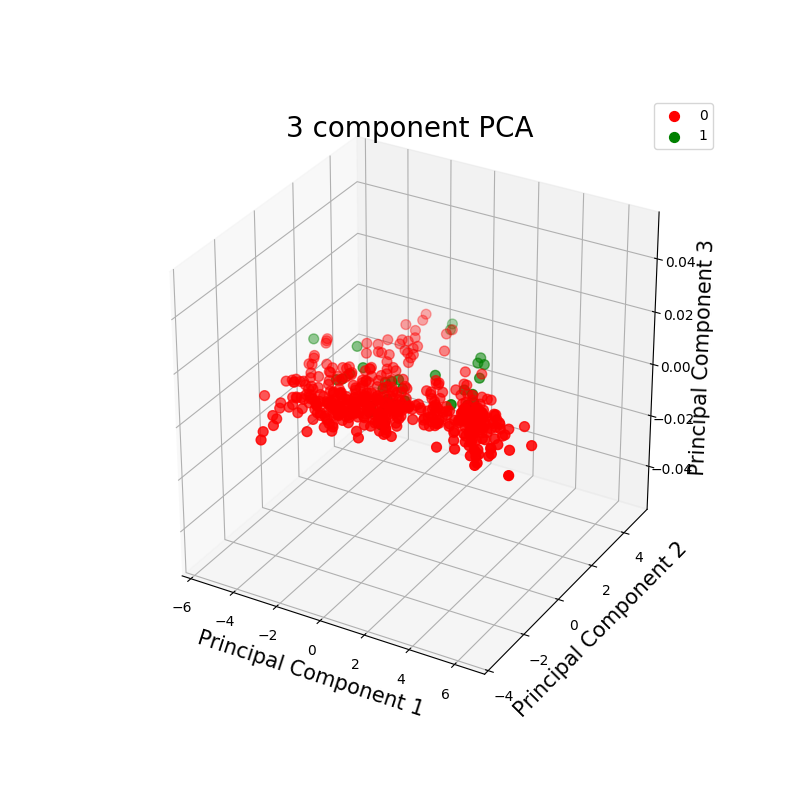

In [0]:
%matplotlib notebook
kpca = kpcaxD(dims=3, k=True)
pca = kpcaxD(dims=3, k=False)

In [0]:
def show_bars(vals):
    total = sum(vals)
    heights = [x * 100 / total for x in vals]
    
    xs = np.array(range(len(heights)))
    fig = plt.figure(figsize = (4,4))
    ax = fig.add_subplot(1,1,1)
    ax.bar(xs, heights)
    plt.show()

<IPython.core.display.Javascript object>


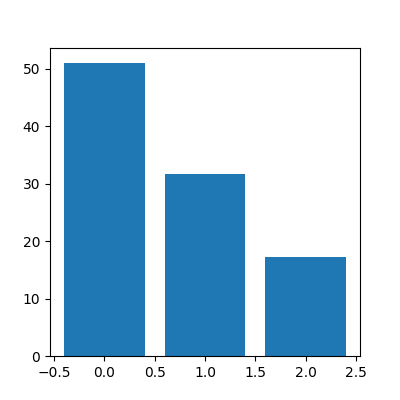

In [0]:
show_bars(kpca.lambdas_)

<IPython.core.display.Javascript object>


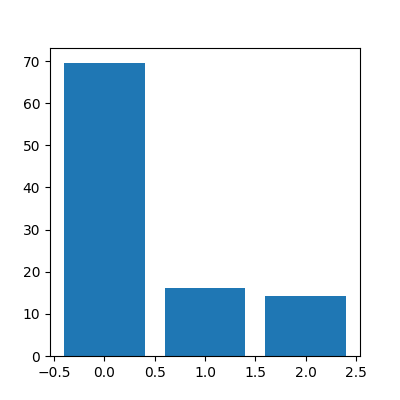

In [0]:
show_bars(pca.explained_variance_)

In [0]:
def near_nei(k, samples, labels):    
    nbrs = NearestNeighbors(k, algorithm='ball_tree').fit(samples)
    distances, indexes = nbrs.kneighbors(samples)
    res = []
    for index, neighbours in enumerate(indexes):
        close = [x for x in neighbours if labels[index] == labels[x]]
        res.append(len(list(close)) / k)
        
    return np.mean(res)

In [0]:
def metric(k):
    print("Original: " + str(near_nei(k, x, df['CHAS'])))
    dfkpca = pd.DataFrame(data=kpca.fit_transform(df))
    print("In kpca: " + str(near_nei(k, dfkpca, df['CHAS'])))
    dfpca = pd.DataFrame(data=pca.fit_transform(df))
    print("In pca: " + str(near_nei(k, dfpca, df['CHAS'])))

In [0]:
metric(3)

Original: 0.9374176548089591
In kpca: 0.9150197628458498
In pca: 0.9202898550724637


In [0]:
def show_knn(rg, fit):
    knn = []
    for k in rg:
        knn.append(near_nei(k, fit, df['CHAS']))
    return knn

def draw_scat(rg, vals):
    kn = show_knn(rg, vals)
    fig = plt.figure(figsize = (4,4))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(rg, kn)
    plt.show()

<IPython.core.display.Javascript object>


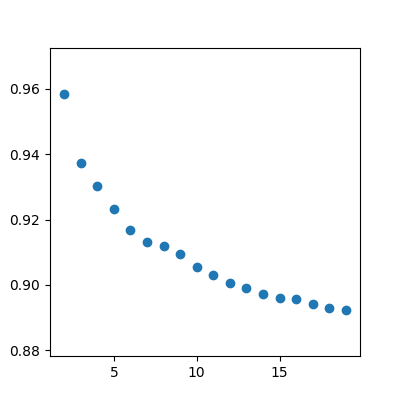

In [0]:
draw_scat(range(2,20), x)

<IPython.core.display.Javascript object>


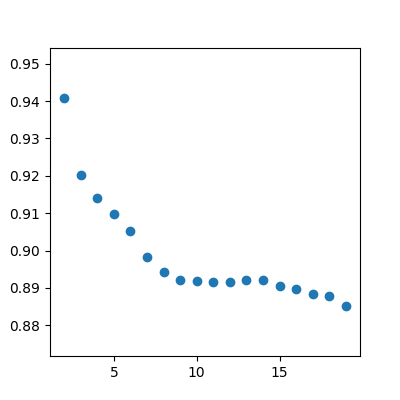

In [0]:
dfpca = pd.DataFrame(data=pca.fit_transform(df))
draw_scat(range(2,20), dfpca)

<IPython.core.display.Javascript object>


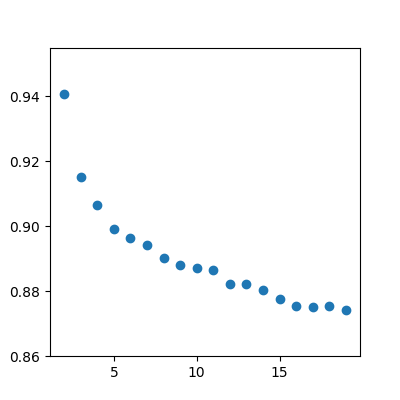

In [0]:
dfkpca = pd.DataFrame(data=kpca.fit_transform(df))
draw_scat(range(2,20), dfkpca)